<a href="https://colab.research.google.com/github/NadeefChowdhury/Tensorflow_2-Regression_1/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [88]:
df = pd.read_csv('/content/SOCR-HeightWeight.csv')

In [89]:
df.head(20)

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
5,6,68.69784,123.3024
6,7,69.80204,141.4947
7,8,70.01472,136.4623
8,9,67.90265,112.3723
9,10,66.78236,120.6672


In [8]:
import seaborn as sns

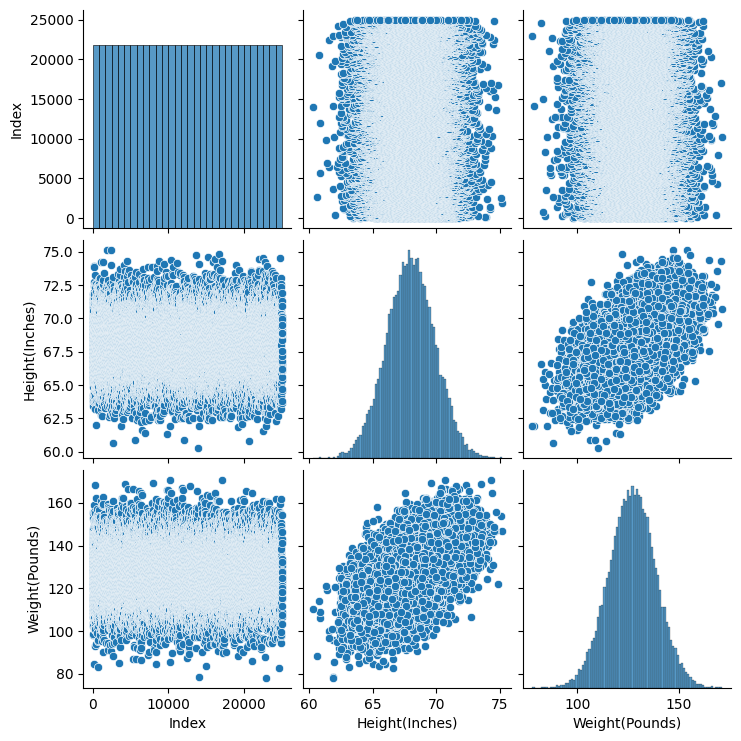

In [90]:
sns.pairplot(df)

In [91]:
from sklearn.model_selection import train_test_split
df.columns

Index(['Index', 'Height(Inches)', 'Weight(Pounds)'], dtype='object')

In [92]:
X = df[['Height(Inches)']].values

In [93]:
y = df['Weight(Pounds)'].values

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [95]:
X_train.shape

(16750, 1)

In [96]:
X_test.shape

(8250, 1)

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaler = MinMaxScaler()

In [99]:
scaler.fit(X_train)

MinMaxScaler()

In [100]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [107]:
model = Sequential([Dense(10, activation='linear'),
                    Dense(10, activation='linear'),
                    Dense(10, activation='linear'),

                    Dense(1)])
model = Sequential()
model.add(Dense(10, activation = 'linear'))
model.add(Dense(10, activation = 'linear'))
model.add(Dense(10, activation = 'linear'))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')

In [108]:
model.fit(x=X_train, y=y_train, epochs=200)

Epoch 1/200
524/524 [==============================] - 2s 2ms/step - loss: 7599.7090
Epoch 2/200
524/524 [==============================] - 1s 2ms/step - loss: 116.9939
Epoch 3/200
524/524 [==============================] - 1s 2ms/step - loss: 104.6546
Epoch 4/200
524/524 [==============================] - 1s 2ms/step - loss: 102.3722
Epoch 5/200
524/524 [==============================] - 1s 2ms/step - loss: 101.9778
Epoch 6/200
524/524 [==============================] - 1s 3ms/step - loss: 101.9930
Epoch 7/200
524/524 [==============================] - 1s 3ms/step - loss: 101.9658
Epoch 8/200
524/524 [==============================] - 1s 3ms/step - loss: 101.9323
Epoch 9/200
524/524 [==============================] - 1s 2ms/step - loss: 101.8958
Epoch 10/200
524/524 [==============================] - 1s 2ms/step - loss: 101.8324
Epoch 11/200
524/524 [==============================] - 1s 2ms/step - loss: 101.7658
Epoch 12/200
524/524 [==============================] - 1s 2ms/step - los

<Axes: >

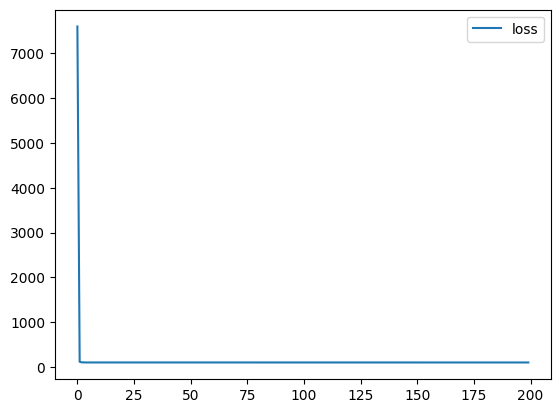

In [109]:
pd.DataFrame(model.history.history).plot()

In [110]:
model.evaluate(X_test, y_test, verbose=0)

103.28287506103516

In [111]:
predictions = model.predict(X_test)

258/258 [==============================] - 1s 2ms/step


In [113]:
predictions = pd.Series(predictions.reshape(8250,))

In [114]:
pred_df = pd.DataFrame(y_test, columns = ['Test True Y'])


In [115]:
pred_df = pd.concat([pred_df, predictions], axis=1)

In [116]:
pred_df.columns = ['Test true Y', 'Model Predictions']

In [117]:
pred_df

,Test true Y,Model Predictions
0,134.2855,127.856735
1,111.9666,126.243851
2,135.9871,125.518433
3,126.3802,129.655014
4,100.1810,129.647568
...,...,...
8245,130.0545,131.226028
8246,119.7082,127.885292
8247,142.8808,129.532944
8248,128.5575,124.453545


<Axes: xlabel='Test true Y', ylabel='Model Predictions'>

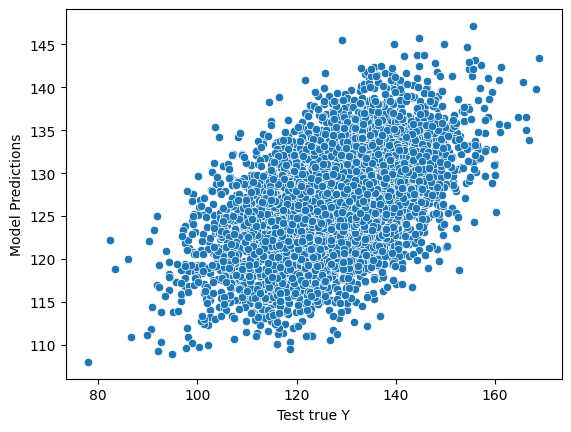

In [122]:
sns.scatterplot(x='Test true Y', y='Model Predictions', data=pred_df.head(5000))